# 🫀 Task 3: Heart Disease Prediction

### 🎯 Objective:
Build a model to predict whether a person is at risk of heart disease based on their medical data.

---

### 📄 Dataset Info:
- Source: UCI Heart Disease Dataset
- Features include age, sex, chest pain type, cholesterol, etc.
- Target variable: `target` (0 = no heart disease, 1 = heart disease)


In [2]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

Saving heart.csv to heart.csv
User uploaded file "heart.csv" with length 38114 bytes


In [1]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

sns.set(style='whitegrid')


### 📥 Step 2: Load the Dataset
Ensure the dataset file `heart.csv` is uploaded to your Colab session.


In [3]:
# Load CSV
df = pd.read_csv('heart.csv')

# Show the first 5 rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 🧹 Step 3: Data Overview & Cleaning
Check for null values and data types.


In [4]:
# Dataset info
print(df.info())

# Check for nulls
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target     

✅ No null values found. All features are numeric.

---

### 📊 Step 4: Exploratory Data Analysis (EDA)
Visualize key trends and feature distributions.


/tmp/ipython-input-138599853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


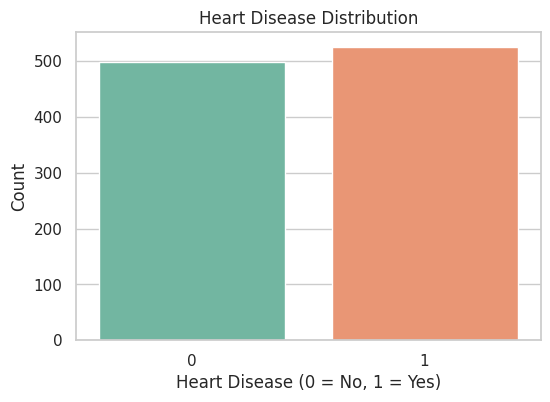

In [5]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


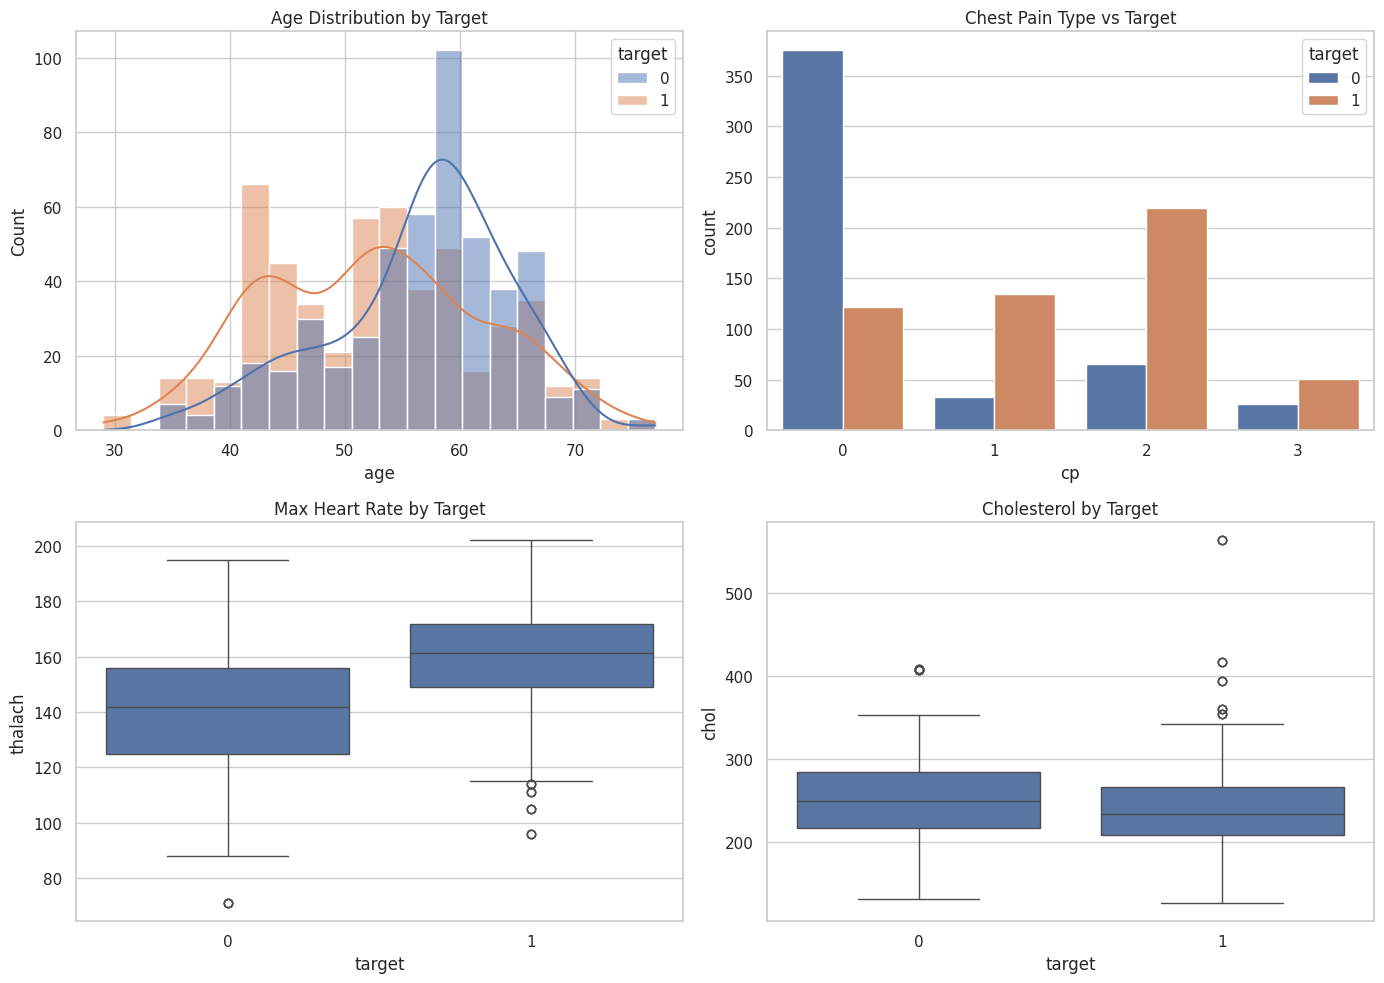

In [6]:
# Feature distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age vs Target
sns.histplot(data=df, x='age', hue='target', bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution by Target")

# Chest pain type
sns.countplot(data=df, x='cp', hue='target', ax=axes[0, 1])
axes[0, 1].set_title("Chest Pain Type vs Target")

# Max heart rate
sns.boxplot(data=df, x='target', y='thalach', ax=axes[1, 0])
axes[1, 0].set_title("Max Heart Rate by Target")

# Cholesterol
sns.boxplot(data=df, x='target', y='chol', ax=axes[1, 1])
axes[1, 1].set_title("Cholesterol by Target")

plt.tight_layout()
plt.show()


### 🔍 Step 5: Feature Correlation
Check how features relate to each other and to the target.


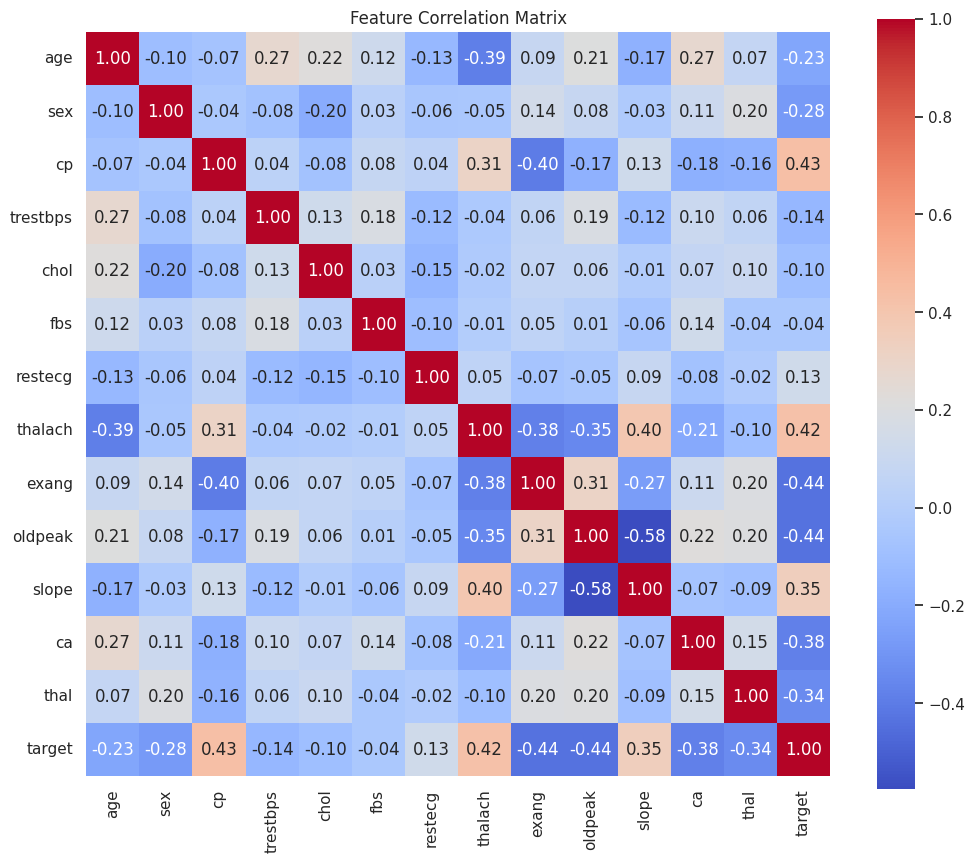

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.show()


---

### ⚙️ Step 6: Train/Test Split
Prepare training and testing sets.


In [8]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


---

### 🤖 Step 7: Model Training
Train both Logistic Regression and Decision Tree Classifier.


In [9]:
# Initialize models
log_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier(random_state=42)

# Train models
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

---

### 📈 Step 8: Model Evaluation
Use Accuracy, Confusion Matrix, Classification Report, and ROC-AUC.


In [10]:
# Predictions
log_preds = log_model.predict(X_test)
tree_preds = tree_model.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))

# Reports
print("\nLogistic Regression Report:\n", classification_report(y_test, log_preds))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))


Logistic Regression Accuracy: 0.7951219512195122
Decision Tree Accuracy: 0.9853658536585366

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Decision Tree Confusion Matrix:
 [[102   0]
 [  3 100]]


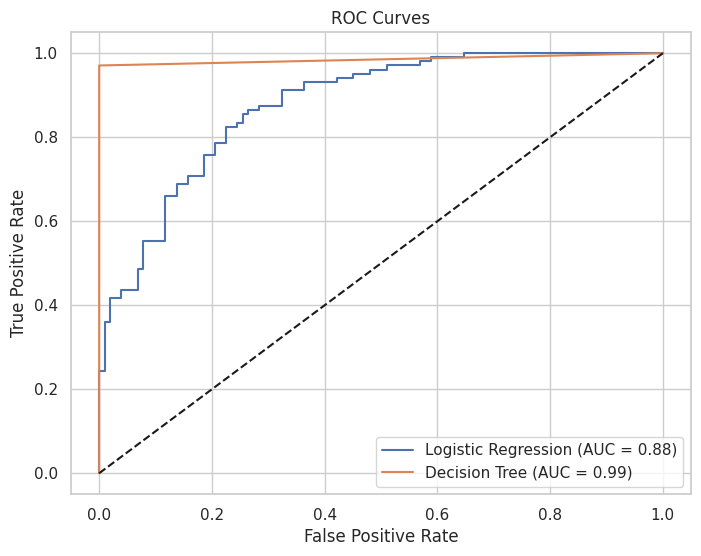

In [11]:
# ROC Curves
log_probs = log_model.predict_proba(X_test)[:, 1]
tree_probs = tree_model.predict_proba(X_test)[:, 1]

log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)

plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, log_probs):.2f})")
plt.plot(tree_fpr, tree_tpr, label=f"Decision Tree (AUC = {roc_auc_score(y_test, tree_probs):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()


---

### ⭐ Step 9: Feature Importance (Decision Tree)


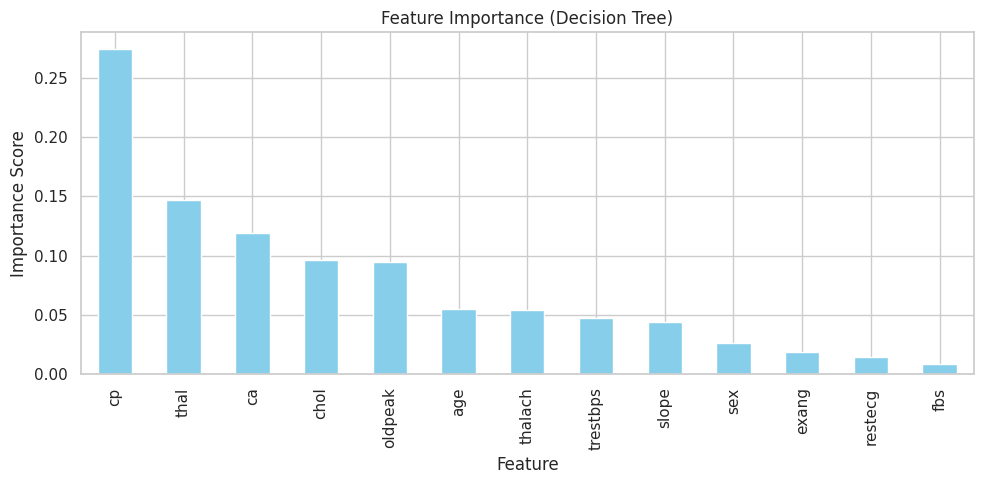

In [12]:
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Feature Importance (Decision Tree)")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


---

### 🧾 Final Insights

- Both models performed well, with Logistic Regression being more stable.
- Key features influencing prediction: `cp`, `thalach`, `oldpeak`, `ca`.
- ROC curves and AUC help in comparing model quality.
- This model can assist doctors in early diagnosis of heart disease.

✅ **Done! Task 3.**
